!pip install opencv-python 

In [197]:
import numpy as np
import pandas as pd

In [198]:
import os
print(os.listdir("../Fruits-classification-120-different-fruits-/data_mini/fruits-360_100x100/fruits-360/Training"))

['Apple 10', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Cherry 1', 'Lemon 1']


In [199]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans

In [200]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("../Fruits-classification-120-different-fruits-/data_mini/fruits-360_100x100/fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [201]:
print(labels)

['Training\\Apple 10' 'Training\\Apple 10' 'Training\\Apple 10' ...
 'Training\\Lemon 1' 'Training\\Lemon 1' 'Training\\Lemon 1']


In [202]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [203]:
id_to_label_dict

{0: 'Training\\Apple 10',
 1: 'Training\\Apple 5',
 2: 'Training\\Apple 6',
 3: 'Training\\Apple 7',
 4: 'Training\\Apple 8',
 5: 'Training\\Apple 9',
 6: 'Training\\Cherry 1',
 7: 'Training\\Lemon 1'}

In [204]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [205]:
def plot_image_grid(images, rows, columns):
    figure = plt.figure(figsize=(columns * 3, rows * 3))
    for i in range(columns * rows):
        figure.add_subplot(rows, columns, i + 1)
        plt.imshow(images[i])
    plt.show()

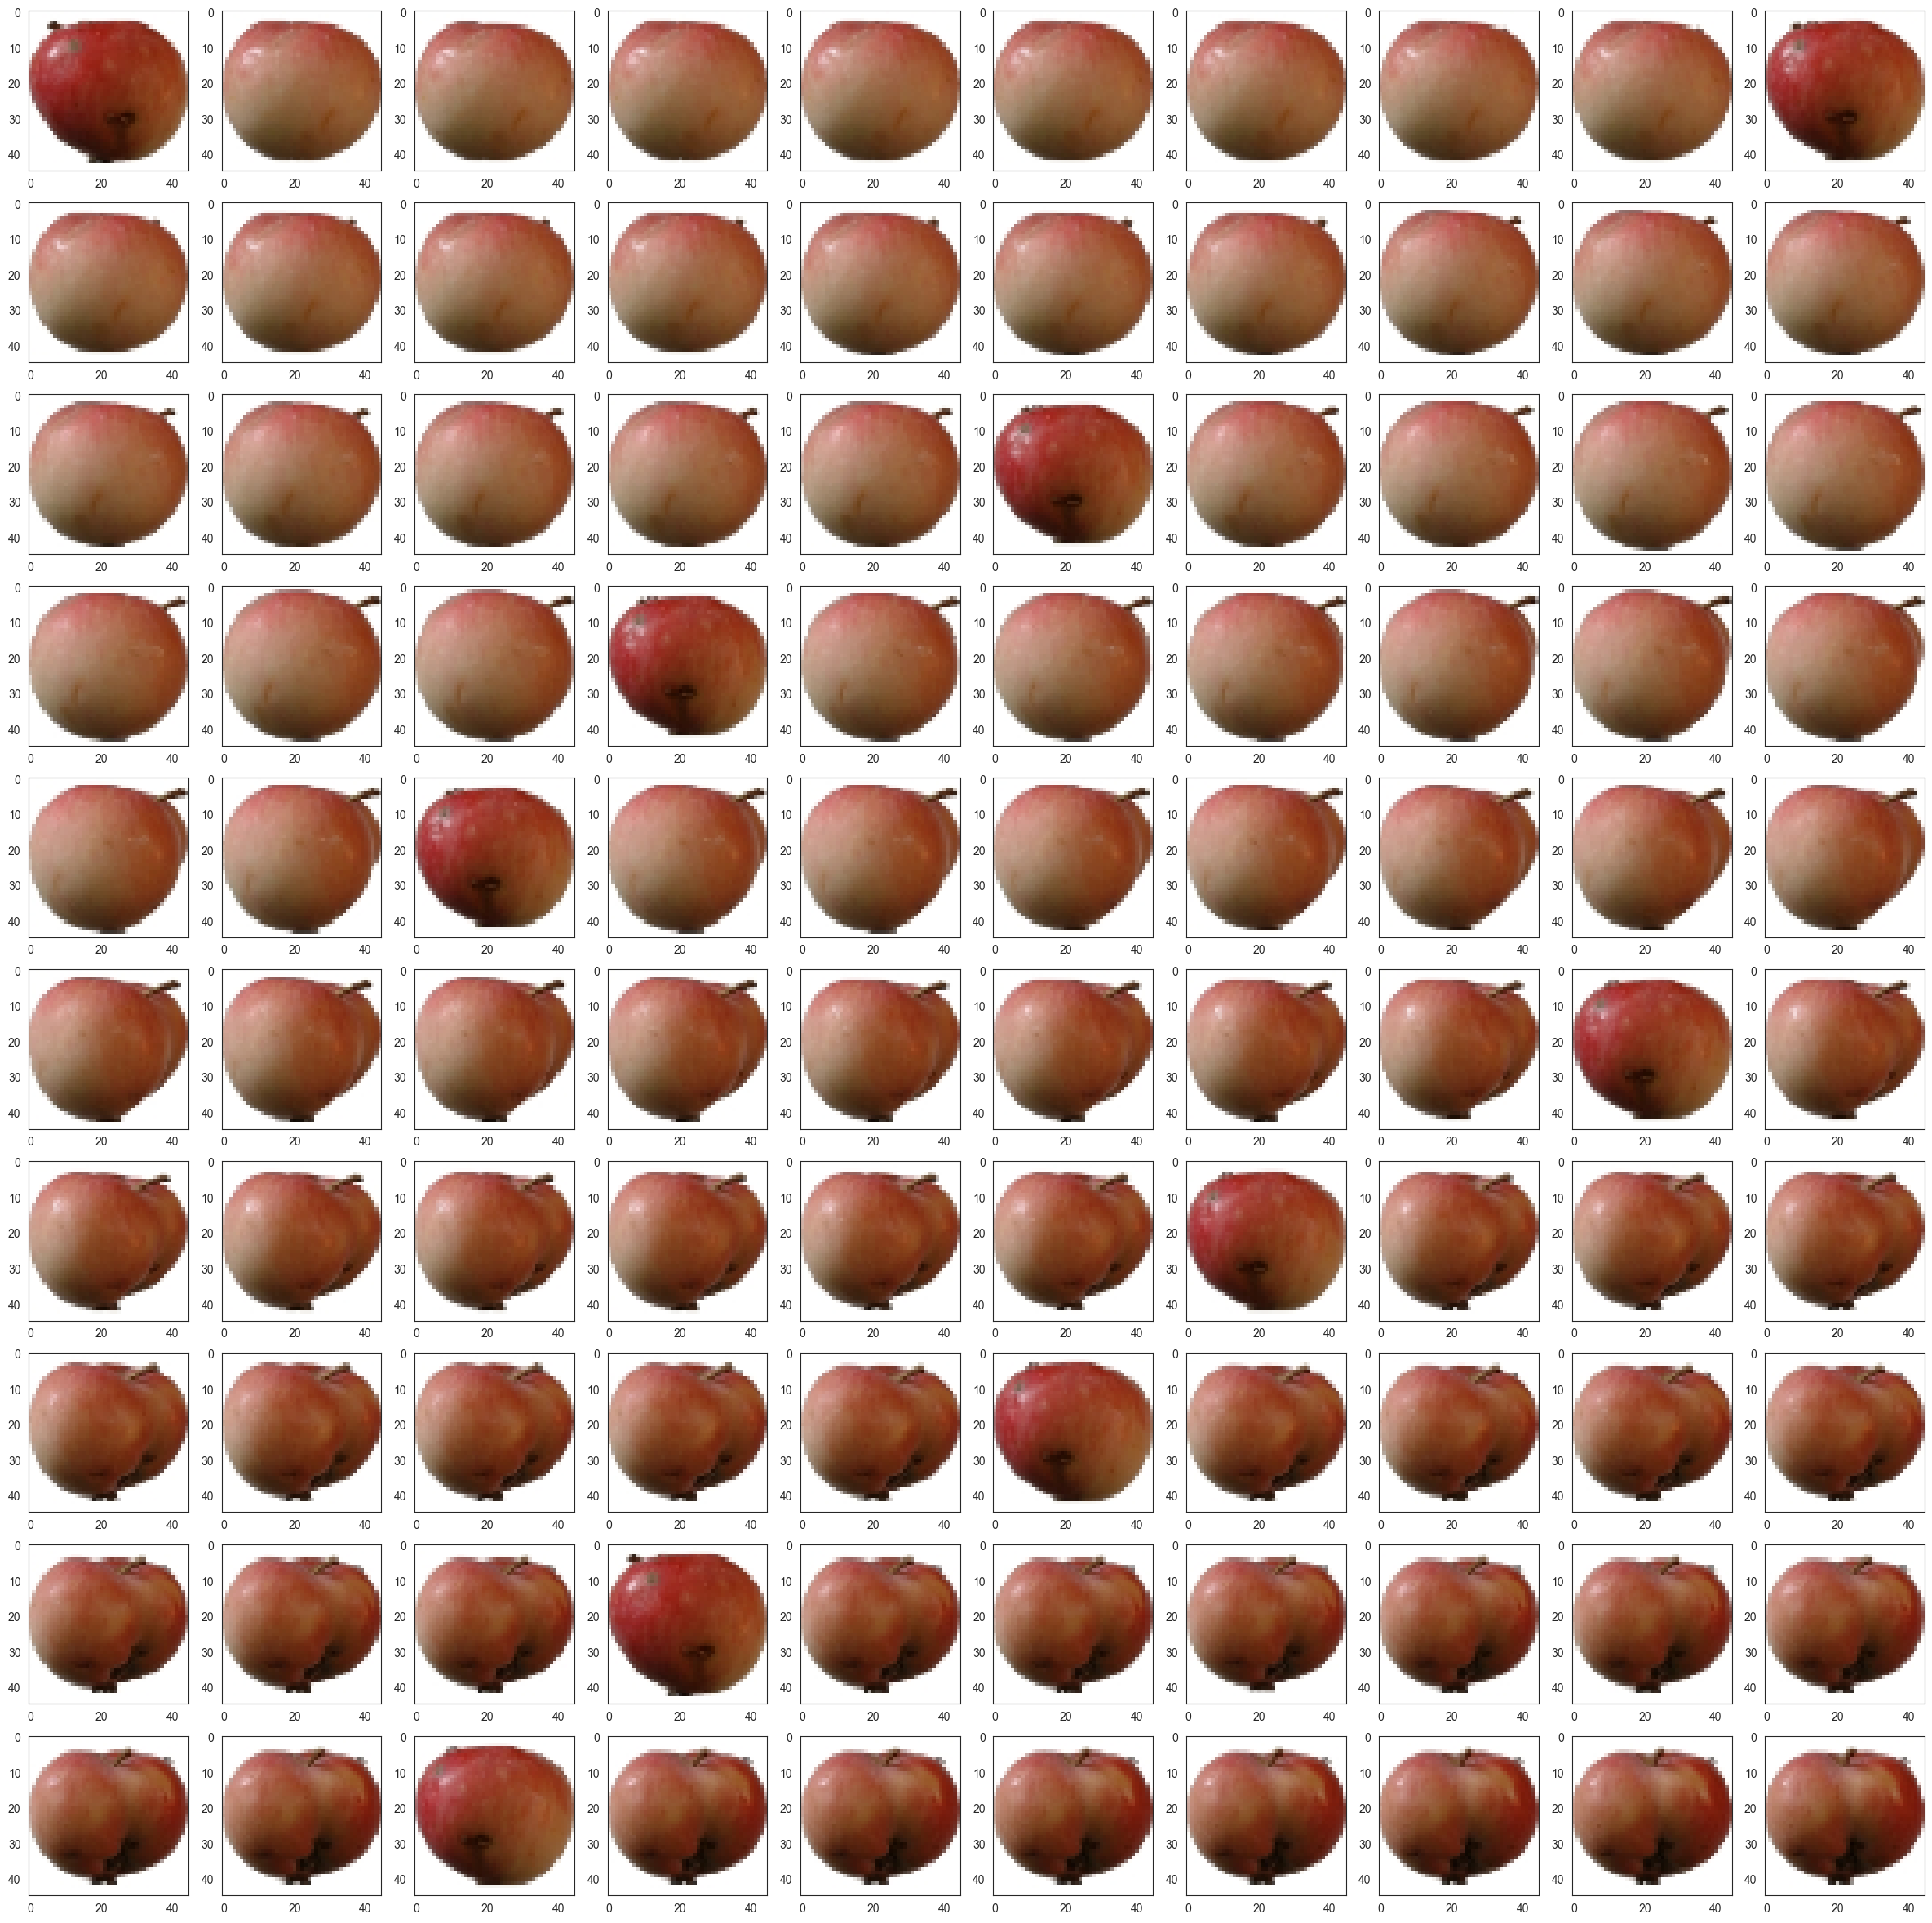

In [206]:
plot_image_grid(fruit_images[0:100], 10, 10)

In [207]:
scaler = StandardScaler()

In [208]:
images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])

In [209]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(images_scaled)

In [210]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [211]:
tsnedf = pd.DataFrame()
tsnedf['x'] = list(tsne_result_scaled[:,0])
tsnedf['y'] = list(tsne_result_scaled[:,1])
tsnedf['label'] = labels
tsnedf.head()

,x,y,label
0,-0.346431,0.220415,Training\Apple 10
1,-0.311754,0.537374,Training\Apple 10
2,-0.333008,0.540514,Training\Apple 10
3,-0.312636,0.542016,Training\Apple 10
4,-0.314405,0.543076,Training\Apple 10


In [212]:

nb_classes = len(np.unique(label_ids))
sns.set_style('white')
#120 for 120 fruits, so 120 different colors
cmap = plt.cm.get_cmap("Spectral", 120) 

plt.figure(figsize=(20,20))
for i, label_id in enumerate(np.unique(label_ids)):
    
    #plot matching labels to tsne results so labels are accurate
    plt.scatter(tsne_result_scaled[np.where(label_ids == label_id), 0],
                tsne_result_scaled[np.where(label_ids == label_id), 1],
                marker = '.',
                c = cmap(i),
                linewidth = '5',
                alpha=0.8,
                label = id_to_label_dict[label_id])
plt.title('T-SNE Plot (PCA 50 Components)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 2)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12596\3603746151.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Spectral", 120)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12596\3603746151.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_result_scaled[np.where(label_ids == label_id), 0],


RuntimeError: Unable to cast Python instance of type <class 'tuple'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

<Figure size 2000x2000 with 1 Axes>

In [213]:
import seaborn as sns

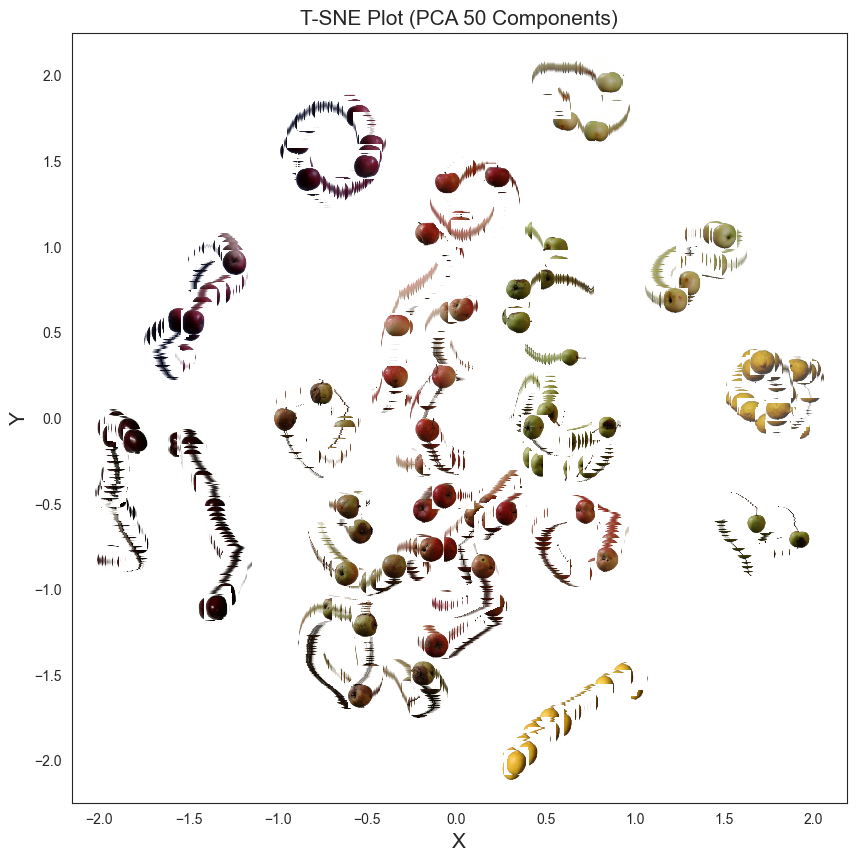

In [214]:
fig, ax = plt.subplots(figsize=(10,10))
for df, i in zip(tsnedf.iterrows(), fruit_images):
    x = df[1]['x']
    y = df[1]['y']
    img = OffsetImage(i, zoom = .4)
    ab = AnnotationBbox(img, (x,y), xycoords = 'data', frameon = False)
    ax.add_artist(ab)
ax.update_datalim(tsnedf[['x', 'y']].values)
ax.autoscale()
plt.title('T-SNE Plot (PCA 50 Components)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()

In [215]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, label_ids, test_size=0.25, random_state=42)

> Sử dụng mô hình RandomForestClassifier

In [216]:
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(X_train, y_train)

In [217]:
test_predictions = forest.predict(X_test)

In [218]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

Accuracy with RandomForest: 100.000000


> Mô hình SVC

In [219]:
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)

In [220]:
test_predictions = svm_clf.predict(X_test)

In [221]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 100.000000


In [222]:

# Bước 1: Đọc ảnh và nhãn từ thư mục Test
validation_fruit_images = []
validation_labels = [] 

for fruit_dir_path in glob.glob("../Fruits-classification-120-different-fruits-/data_mini/fruits-360_100x100/fruits-360/Test/*"):
    fruit_label = os.path.basename(fruit_dir_path)
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)

validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

# Bước 2: In thử label
print("Một số nhãn ví dụ:", validation_labels[:10])
print("Tổng số ảnh:", len(validation_labels))

# Bước 3: Tạo label_to_id_dict từ chính validation_labels (nếu chỉ dùng tập Test)
unique_labels = np.unique(validation_labels)
label_to_id_dict = {label: idx for idx, label in enumerate(unique_labels)}

# Bước 4: Gán ID
validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])


Một số nhãn ví dụ: ['Apple 10' 'Apple 10' 'Apple 10' 'Apple 10' 'Apple 10' 'Apple 10'
 'Apple 10' 'Apple 10' 'Apple 10' 'Apple 10']
Tổng số ảnh: 1550


In [223]:
validation_fruit_images = []
validation_labels = [] 

for fruit_dir_path in glob.glob("../Fruits-classification-120-different-fruits-/data_mini/fruits-360_100x100/fruits-360/Test/*"):
    fruit_label = os.path.basename(fruit_dir_path) 
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)

validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [224]:
print(validation_labels)

['Apple 10' 'Apple 10' 'Apple 10' ... 'Lemon 1' 'Lemon 1' 'Lemon 1']


In [225]:
validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])

In [226]:
validation_images_scaled = scaler.transform([i.flatten() for i in validation_fruit_images])

In [227]:
validation_pca_result = pca.transform(validation_images_scaled)

In [228]:
test_predictions = forest.predict(validation_pca_result)

In [229]:
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision))

Validation Accuracy with Random Forest: 99.741935


In [230]:
test_predictions = svm_clf.predict(validation_pca_result)

In [231]:
precision = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with SVM: {0:.6f}".format(precision))

Validation Accuracy with SVM: 100.000000


> So sánh mô hình (accuracy)

In [232]:
precision_Random_Forest = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision_Random_Forest))

precision_SVM = accuracy_score(test_predictions, validation_label_ids) * 100
print("Validation Accuracy with SVM: {0:.6f}".format(precision_SVM))


Validation Accuracy with Random Forest: 100.000000
Validation Accuracy with SVM: 100.000000


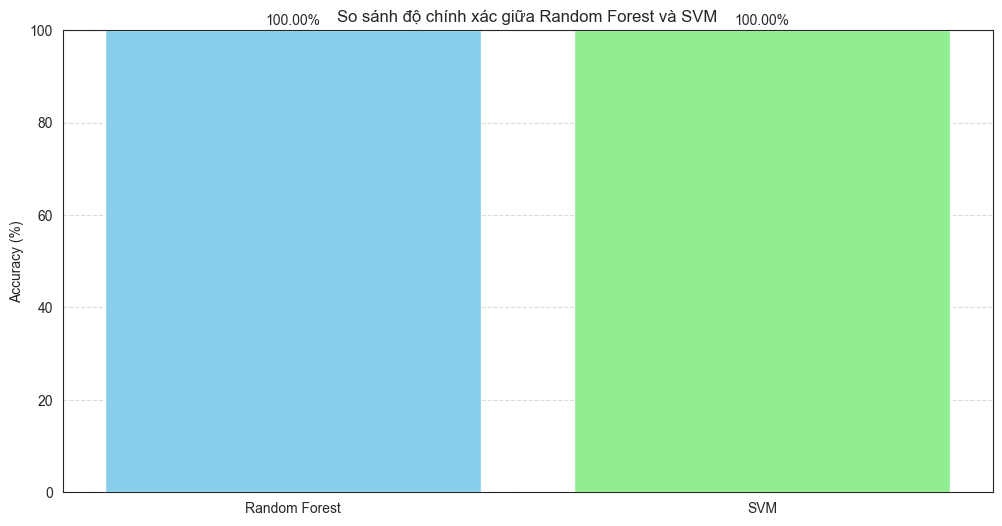

In [233]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'SVM']
accuracies = [precision_Random_Forest, precision_SVM]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom')

plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('So sánh độ chính xác giữa Random Forest và SVM')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [234]:
import numpy as np
import joblib

label_to_id_dict = {v: i for i, v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}


joblib.dump(id_to_label_dict, "id_to_label_dict.pkl")
joblib.dump(forest, 'random_forest_model.pkl')
joblib.dump(svm_clf, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl') 
joblib.dump(pca, "pca.pkl")


['pca.pkl']

> Những gì đã làm:
- Đọc và resize dữ liệu hình ảnh từ thư mục Training và Test.
- Gán nhãn và mã hóa nhãn thành số (label_to_id_dict).
- Trực quan hóa dữ liệu bằng T-SNE.
- Trích xuất đặc trưng ảnh (flatten ảnh và chuẩn hóa).
- Dùng PCA để giảm chiều dữ liệu.
- Huấn luyện mô hình (Random Forest, SVM).
- Đánh giá độ chính xác (accuracy_score) của từng mô hình.